In [1]:
#Importing requied libraries
import tensorflow as tf
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Re-size all the images accoring to VGG16
IMAGE_SIZE = [224, 224]

In [7]:
# Assign the path for dataset
train_path = (r"C:\Users\BISWA\Desktop\Datasets\Train")
valid_path = (r"C:\Users\BISWA\Desktop\Datasets\Test")

In [8]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 38s 1us/step


In [9]:
# don't want to train again existing weights
for layer in vgg.layers:
  layer.trainable = False

In [12]:
# Getting number of classes for predection using glob function
folders = glob(r'C:\Users\BISWA\Desktop\Datasets\Train/*')

In [14]:
# Flatten the dataset for full connected layer
x = Flatten()(vgg.output)
# Using folder option to predict the class
prediction = Dense(len(folders), activation='softmax')(x)

In [15]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [16]:
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [17]:
# tell the model what cost and optimization method to use
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
from keras.preprocessing.image import ImageDataGenerator

In [19]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [20]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
training_set = train_datagen.flow_from_directory(r'C:\Users\BISWA\Desktop\Datasets\Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3000 images belonging to 3 classes.


In [22]:
test_set = test_datagen.flow_from_directory(r"C:\Users\BISWA\Desktop\Datasets\Test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1554 images belonging to 3 classes.


In [30]:
class_dict = training_set.class_indices
print(class_dict)

{'french_fries': 0, 'ice_cream': 1, 'omelette': 2}


In [23]:
# fit the model
r = model.fit_generator(training_set,
                        validation_data=test_set,
                        epochs=5,
                        steps_per_epoch=len(training_set),
                        validation_steps=len(test_set))

Epoch 1/5
94/94 [==============================] - 1975s 21s/step - loss: 0.5995 - accuracy: 0.7717 - val_loss: 0.4730 - val_accuracy: 0.9106
Epoch 2/5
94/94 [==============================] - 1845s 20s/step - loss: 0.3147 - accuracy: 0.8790 - val_loss: 0.1820 - val_accuracy: 0.8629
Epoch 3/5
94/94 [==============================] - 1721s 18s/step - loss: 0.2253 - accuracy: 0.9200 - val_loss: 0.0853 - val_accuracy: 0.9402
Epoch 4/5
94/94 [==============================] - 1765s 19s/step - loss: 0.1581 - accuracy: 0.9433 - val_loss: 0.2374 - val_accuracy: 0.9653
Epoch 5/5
94/94 [==============================] - 1735s 18s/step - loss: 0.1281 - accuracy: 0.9573 - val_loss: 0.0367 - val_accuracy: 0.9813


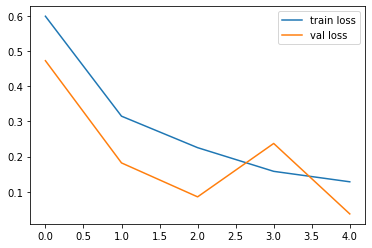

<Figure size 432x288 with 0 Axes>

In [25]:
# ploting loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

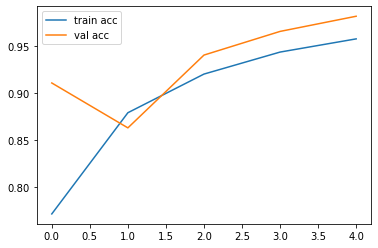

<Figure size 432x288 with 0 Axes>

In [28]:
# ploting accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

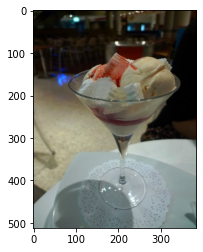

In [145]:
#show the test image
test_image = image.load_img(r"C:\Users\BISWA\Desktop\Datasets\Test\ice_cream\128941.jpg")
plt.imshow(test_image) 

In [141]:
#Testing the model
from keras.preprocessing import image
test_image = image.load_img(r"C:\Users\BISWA\Desktop\Datasets\Test\ice_cream\128941.jpg",target_size = (224, 224, 3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

In [142]:
result

array([[0., 1., 0.]], dtype=float32)

In [144]:
#Getting predict result
if result[0][0] == 1:
    print('french_fries')
elif result[0][1] == 1:
    print('ice_cream')
else:
    print('omelette')

ice_cream
